In [1]:
import sys
import torch
import matplotlib.pyplot as plt
from xitorch.optimize import rootfinder

from scipy.interpolate import interp1d
sys.path.append('..')
from hijacobi import Task, Spherically_Symmetric, reparam


11:14:23|TQ-WARNING| Error enabling CUDA. cuda.is_available() returned False. CPU will be used.


In [2]:
# Setting model
metric_f = lambda r: 1-2/r
BH = Spherically_Symmetric(f=metric_f)

# Setting up solver
Solver0 = reparam(BH)
Solver0.set_Simpson()
Solver0.setup(2.4, 1e-4, 40, 31)
Solver0.setCustomIth(BH.Ith)

# Setting up task
th_s = torch.pi/2
th_obs = torch.pi/5

r_s = torch.Tensor([2.1, 2.4, 3, 3.5, 5, 8, 9])
r_obs = 50

ic_0 = torch.Tensor([[[th_s, th_obs], [r_, r_obs]]for r_ in r_s ])

Task0 = Task(BH, [[0, 0, ic_0]])
Task0.set_solver(Solver0)

Test passed, setting fuction as Ith


In [3]:
eq00 = Task0.make_eq(0, 1)

eq_p = lambda p, gma: eq00(Solver0.L(gma, abs(p)), Solver0.Q(gma, abs(p)))

gma0 = torch.linspace(0, 2, 24)*torch.pi
p0 = torch.ones_like(gma0)

gma_res, p_res, err = Solver0.solve(eq_p, gma0, p0, 3)

c:\Users\aleks\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ..\aten\src\ATen\native\TensorShape.cpp:3484.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
c:\Users\aleks\AppData\Local\Programs\Python\Python310\lib\site-packages\xitorch\_impls\optimize\root\rootsolver.py:165: ConvergenceWarning: The rootfinder does not converge after 40 iterations. Best |dx|=2.449e+00, |f|=7.217e-01 at iter 1
  warnings.warn(ConvergenceWarning(msg))
c:\Users\aleks\AppData\Local\Programs\Python\Python310\lib\site-packages\xitorch\_impls\optimize\root\rootsolver.py:165: ConvergenceWarning: The rootfinder does not converge after 40 iterations. Best |dx|=7.352e+00, |f|=3.061e-01 at iter 2
  warnings.warn(ConvergenceWarning(msg))
c:\Users\aleks\AppData\Local\Programs\Python\Python310\lib\site-packages\xitorch\_impls\optim

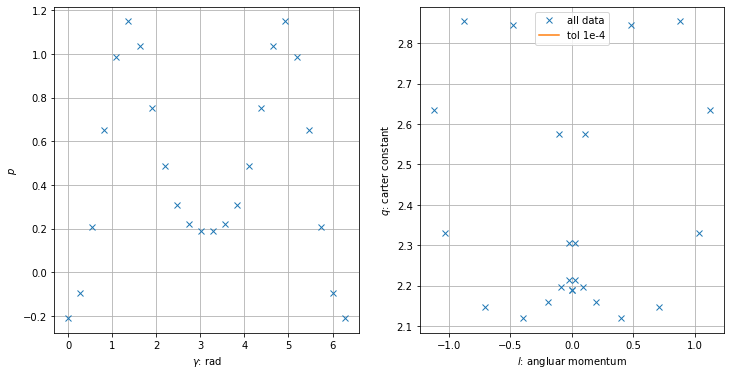

In [4]:
mask_t = torch.less(abs(err), 1e-4)

p_true = torch.nan*torch.ones_like(gma_res)
p_true[mask_t] = p_res[mask_t]

l_all = Solver0.L(gma_res, p_res)
q_all = Solver0.Q(gma_res, p_res)

l_true = Solver0.L(gma_res, p_true)
q_true= Solver0.Q(gma_res, p_true)

fig, ax = plt.subplots(1,2, figsize=(12,6))

ax[0].plot(gma_res, p_res, 'x')
ax[0].plot(gma_res, p_true)
ax[0].set_xlabel('$\gamma$: rad')
ax[0].set_ylabel('$p$')
ax[0].grid('on')

ax[1].plot(l_all, q_all, 'x')
ax[1].plot(l_true, q_true)
ax[1].set_xlabel('$l$: angluar momentum')
ax[1].set_ylabel('$q$: carter constant')
ax[1].legend(['all data', 'tol 1e-4'], )
ax[1].grid('on')

plt.show()

In [66]:
def test_f(p, gma):
    outp = torch.ones_like(gma) + gma
    mask1 = torch.greater_equal(gma,  1)
    outp[mask1] = gma[mask1] - p[mask1] + 0.01
    return outp

c:\Users\aleks\AppData\Local\Programs\Python\Python310\lib\site-packages\torchquad\integration\utils.py:255: UserWarning: DEPRECATION WARNING: In future versions of torchquad, an array-like object will be returned.
  warnings.warn(
c:\Users\aleks\AppData\Local\Programs\Python\Python310\lib\site-packages\xitorch\_impls\optimize\root\rootsolver.py:165: ConvergenceWarning: The rootfinder does not converge after 80 iterations. Best |dx|=1.000e+00, |f|=1.206e+00 at iter 0
  warnings.warn(ConvergenceWarning(msg))
c:\Users\aleks\AppData\Local\Programs\Python\Python310\lib\site-packages\xitorch\_impls\optimize\root\rootsolver.py:165: ConvergenceWarning: The rootfinder does not converge after 80 iterations. Best |dx|=1.000e+00, |f|=1.198e+00 at iter 0
  warnings.warn(ConvergenceWarning(msg))
c:\Users\aleks\AppData\Local\Programs\Python\Python310\lib\site-packages\xitorch\_impls\optimize\root\rootsolver.py:165: ConvergenceWarning: The rootfinder does not converge after 80 iterations. Best |dx|=1

tensor([0.0000, 0.4488, 0.8976, 1.3464, 1.7952, 2.2440, 2.6928, 3.1416])
tensor([1.1167, 1.1534, 1.1684, 1.1460, 1.0622,    nan,    nan,    nan])


c:\Users\aleks\AppData\Local\Programs\Python\Python310\lib\site-packages\xitorch\_impls\optimize\root\rootsolver.py:165: ConvergenceWarning: The rootfinder does not converge after 80 iterations. Best |dx|=5.000e-01, |f|=9.077e-01 at iter 1
  warnings.warn(ConvergenceWarning(msg))
